In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [13]:
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
person_rand = [0.4997632, 0.53151315, 0.4953193, 0.48565182, 0.51492274, 0.50330985, 0.47631958, 0.5]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
face_rand = [0.50652635, 0.49794447, 0.6964292, 0.5, 0.57799053, 0.4734094, 0.5340897, 0.5132827]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
animal_rand = [0.490, 0.518, 0.467, 0.506, 0.492, 0.492, 0.490, 0.460]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
vehicle_rand = [0.51243365, 0.46709448, 0.5088834, 0.5, 0.4573095, 0.5398707, 0.5137987, 0.5396303]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
outdoor_rand = [0.4352548, 0.47683832, 0.54090405, 0.4749565, 0.50131303, 0.49639726, 0.45271426, 0.3698519]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
sports_rand = [0.4761905, 0.5304762, 0.50676864, 0.5143444, 0.50541246, 0.5006824, 0.4957806, 0.49680126]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
food_rand = [0.4390853, 0.54637724, 0.5690207, 0.49045455, 0.5523299, 0.5573561, 0.48547196, 0.44132835]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
furniture_rand = [0.5313172, 0.49489248, 0.47832003, 0.49440512, 0.42427492, 0.56255865, 0.52089465, 0.49288598]


In [14]:
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand, vehicle_rand, sports_rand, food_rand, outdoor_rand]
CTEs = [np.mean(c) for c in categories]
CTEs_rand = [np.mean(c) for c in categories_rand]
error = [np.std(c) for c in categories]
error_rand = [np.std(c) for c in categories_rand]

In [15]:
x_pos = np.arange(len(categories))*5
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']

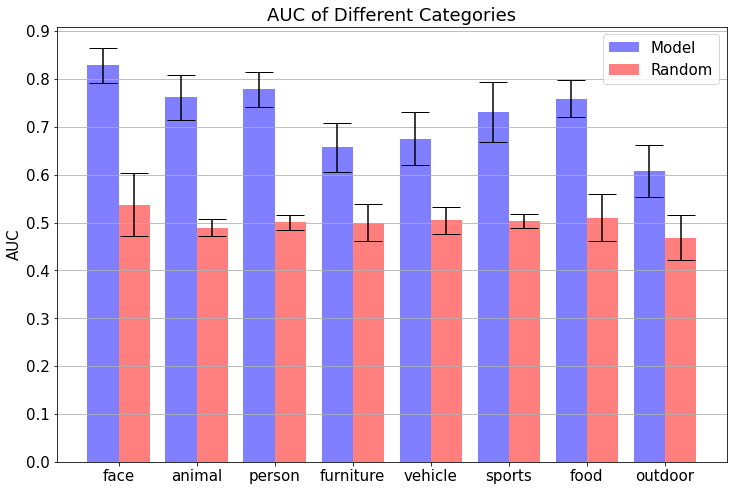

In [16]:
# Build the plot
plt.rc('font', size=15)
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.yticks(np.arange(0, 1, 0.1))
ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.5, ecolor='black', capsize=14, width=2)
ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.5, ecolor='black', capsize=14, width=2)
ax.set_ylabel('AUC')
ax.set_xticks(x_pos+1)
ax.set_xticklabels(names)
ax.set_title('AUC of Different Categories')
ax.yaxis.grid(True)
ax.legend(['Model', 'Random'])
# Save the figure and show
# plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [20]:
pvals = []
for r, u, v in zip(names, categories,categories_rand):
    print(r,':')
    t_stat = stats.ttest_ind(u, v).statistic
    pval = stats.ttest_ind(u, v).pvalue / 2
    print('t-statistic:', t_stat, 'p-value:', pval)
    pvals.append(pval)
# Create a list of the adjusted p-values
reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
print("Bonferroni:\n")
print("Reject:", reject)
print("pvals corrected:", pvals_corrected)
reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
print("Benjamini/Hochberg:\n")
print("Reject:", reject)
print("pvals corrected:", pvals_corrected)

face :
t-statistic: 10.11598979645343 p-value: 4.048212655325941e-08
animal :
t-statistic: 14.485996688747932 p-value: 4.0327720375866824e-10
person :
t-statistic: 18.272385980721282 p-value: 1.8229482953080907e-11
furniture :
t-statistic: 6.424601156575583 p-value: 7.940906584404202e-06
vehicle :
t-statistic: 7.301613495177112 p-value: 1.9499300348921045e-06
sports :
t-statistic: 9.325960202953269 p-value: 1.1007113032725453e-07
food :
t-statistic: 10.48336492617673 p-value: 2.5948253991602724e-08
outdoor :
t-statistic: 5.123433637760139 p-value: 7.743513102378257e-05
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [3.23857012e-07 3.22621763e-09 1.45835864e-10 6.35272527e-05
 1.55994403e-05 8.80569043e-07 2.07586032e-07 6.19481048e-04]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [8.09642531e-08 1.61310882e-09 1.45835864e-10 9.07532181e-06
 2.59990671e-06 1.76113809e-07 6.91953440e-08 7.74351310